# Polymerization protocol

This jupyter notebook was developed to polymerize homopolymers and copolymers separately

There is no need to assign head and tail previously since m2p detects the bond formation.

If you desire to predict the head and tail assignment, please provide head_tail=True.

Developed by: **Brenda Ferrari**

In [18]:
import sys
sys.path.append('..')

import pandas as pd
from m2pCalc.polymaker import PolyMaker
from rdkit import Chem

pm = PolyMaker(head_tail=True) 

* Read desirable dataset

The necessary information for the polymerization is polymer name and monomer smiles so, please, prepare the data accordingly

In [19]:
df = pd.read_csv("../datasets_tests/monomers.csv", sep=",", index_col='name')

In [20]:
df

,smiles
name,
Nylon 3 - Poly(propiolactam),C1CNC1=O
Nylon 6 - Poly(caprolactam),O=C1CCCCCN1
Nylon 8 - Polycapryllactam,O=C1CCCCCCCN1
Nylon 10 - Poly(decano-10-lactam),NCCCCCCCCCC(=O)O
Nylon 11 - Poly(undecano-11-lactam),NCCCCCCCCCCC(=O)O
...,...
Poly(cyclohexyl alpha-chloroacrylate),C=C(Cl)C(=O)OC1CCCCC1
Poly(4-cyclohexyl-1-butene),C=CCCC1CCCCC1
Poly(3-cyclopentyl-1-propene),C=CCC1CCCC1


* Get only product and remove atom mappings of reaction smiles (Optional)

In [ ]:
from m2pCalc.data import Data

data = Data(df)
df = data.clean_smiles(name_column='name', smiles_column='smiles', reaction=True)
df

* Separates 2 monomers and 3 monomers, get only product and remove atom mappings of reaction smiles

In [21]:
from m2pCalc.data import Data

data = Data(df)
df1, df2, df3, df4 = data.separate_copolymers(smiles_row='smiles')

In [22]:
df1

,smiles
Nylon 3 - Poly(propiolactam),C1CNC1=O
Nylon 6 - Poly(caprolactam),O=C1CCCCCN1
Nylon 8 - Polycapryllactam,O=C1CCCCCCCN1
Nylon 10 - Poly(decano-10-lactam),NCCCCCCCCCC(=O)O
Nylon 11 - Poly(undecano-11-lactam),NCCCCCCCCCCC(=O)O
...,...
Poly(cyclohexyl alpha-chloroacrylate),C=C(Cl)C(=O)OC1CCCCC1
Poly(4-cyclohexyl-1-butene),C=CCCC1CCCCC1
Poly(3-cyclopentyl-1-propene),C=CCC1CCCC1
Poly(3-cyclohexyl-1-propene),C=CCC1CCCCC1


In [23]:
df2

,smiles
"Nylon 4,6 - Poly(tetramethylene adipamide)",OC(=O)CCCCC(=O)O.NCCCCN
"Nylon 6,6 - Poly(hexamethylene adipamide)",OC(=O)CCCCC(=O)O.NCCCCCCN
"Nylon 6,9 - Poly(hexamethylene azelamide)",OC(=O)CCCCCCCC(=O)O.NCCCCCCN
"Nylon 6,10 - Poly(hexamethylene sebacamide)",OC(=O)CCCCCCCCC(=O)O.NCCCCCCN
"Nylon 6,12 - Poly(hexamethylene dodecanediamide)",OC(=O)CCCCCCCCCCC(=O)O.NCCCCCCN
"Nylon 10,10 - Poly(decamethylene sebacamide)",OC(=O)CCCCCCCCC(=O)O.NCCCCCCCCCCN
"Poly(hexamethylene isophthalamide), PA 6I",NCCCCCCN.O=C(Cl)c1cccc(C(=O)Cl)c1
"Poly(hexamethylene teraphthalamide), PA 6T",NCCCCCCN.ClC(=O)c1ccc(cc1)C(=O)Cl
Kevlar - Polyaramide,Nc1ccc(cc1)N.ClC(=O)c1ccc(cc1)C(=O)Cl
Nomex - Poly(m-phenylene terephthalamide),Nc1cc(ccc1)N.ClC(=O)c1cc(ccc1)C(=O)Cl


In [24]:
df3

""


* Save input files if necessary

In [ ]:
import csv

df1.to_csv("data_input.csv", sep=",", index=True, quoting=csv.QUOTE_ALL)

* Polymerize homopolymers

In [27]:
# get monomers from smiles strings
df1['monomers'] = df1.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
df1 = pm.thermoplastic(df1,DP=2,mechanism="all",replicate_structures=1, head_tail=True, all_possibilities=True)

# output
df1

100%|██████████| 172/172 [00:28<00:00,  6.05it/s]


,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism
0,NCCCCCCCCCC(=O)O,"('NCCCCCCCCCC(=O)O',)",[],0,NCCCCCCCCCC(=O)[Kr]NCCCCCCCCCC(=O)O,amide
1,C1CNC1=O,"('O=C1CCN1',)",[],0,ERROR_01:NoReaction,all
2,O=C1CCCCCN1,"('O=C1CCCCCN1',)",[],0,ERROR_01:NoReaction,all
3,O=C1CCCCCCCN1,"('O=C1CCCCCCCN1',)",[],0,ERROR_01:NoReaction,all
4,C=C(C)C(=O)OC(C)C(C)(C)C,"('C=C(C)C(=O)OC(C)C(C)(C)C',)",[],0,CC(OC(=O)C(C)([XeH])CC(C)(C[Kr])C(=O)OC(C)C(C)...,vinyl
...,...,...,...,...,...,...
614,C=C(F)F,"('C=C(F)F',)",[],0,FC(F)([Kr])CC(F)(F)C[XeH],vinyl
615,C=Cc1ccccc1,"('C=Cc1ccccc1',)",[],0,[Kr]CC(CC([XeH])c1ccccc1)c1ccccc1,vinyl
616,C=Cc1ccccc1,"('C=Cc1ccccc1',)",[],0,[Kr]CC(c1ccccc1)C(C[XeH])c1ccccc1,vinyl
617,C=Cc1ccccc1,"('C=Cc1ccccc1',)",[],0,[Kr]C(CCC([XeH])c1ccccc1)c1ccccc1,vinyl


* Polymerize copolymers (2 monomers)

In [26]:
# get monomers from smiles strings
df2['monomers'] = df2.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
df2 = pm.thermoplastic(df2,DP=2,mechanism="all",replicate_structures=1, head_tail=True, all_possibilities=True)

# output
df2

100%|██████████| 34/34 [00:07<00:00,  4.50it/s]


,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism
0,Nc1ccc(cc1)N.ClC(=O)c1ccc(cc1)C(=O)Cl,"('Nc1ccc(N)cc1', 'O=C(Cl)c1ccc(C(=O)Cl)cc1')",[],0,ERROR_01:NoReaction,all
1,OCCCCO.O=C=Nc1ccc(cc1)Cc1ccc(cc1)N=C=O,"('OCCCCO', 'O=C=Nc1ccc(Cc2ccc(N=C=O)cc2)cc1')",[],0,O=C=Nc1ccc(Cc2ccc(NC(=O)[Kr]OCCCCO)cc2)cc1,Urethane
2,OC(=O)c1ccc(cc1)C(=O)O.OCCCO,"('O=C(O)c1ccc(C(=O)O)cc1', 'OCCCO')",[],0,O=C(O)c1ccc(C(=O)[Kr]OCCCO)cc1,ester
3,OC(=O)CCC(=O)O.OCCCO,"('O=C(O)CCC(=O)O', 'OCCCO')",[],0,O=C(O)CCC(=O)[Kr]OCCCO,ester
4,OC(=O)CCCCC(=O)O.OCCCO,"('O=C(O)CCCCC(=O)O', 'OCCCO')",[],0,O=C(O)CCCCC(=O)[Kr]OCCCO,ester
5,NCCCCCCCCCN.ClC(=O)c1ccc(cc1)C(=O)Cl,"('NCCCCCCCCCN', 'O=C(Cl)c1ccc(C(=O)Cl)cc1')",[],0,ERROR_01:NoReaction,all
6,OC(=O)CCC(=O)O.OCCCCCCO,"('O=C(O)CCC(=O)O', 'OCCCCCCO')",[],0,O=C(O)CCC(=O)[Kr]OCCCCCCO,ester
7,OC(=O)CCCCCCCCC(=O)O.OCCCCCCO,"('O=C(O)CCCCCCCCC(=O)O', 'OCCCCCCO')",[],0,O=C(O)CCCCCCCCC(=O)[Kr]OCCCCCCO,ester
8,NCCCCCCN.ClC(=O)c1ccc(cc1)C(=O)Cl,"('NCCCCCCN', 'O=C(Cl)c1ccc(C(=O)Cl)cc1')",[],0,ERROR_01:NoReaction,all
9,NCCCCCCN.O=C(Cl)c1cccc(C(=O)Cl)c1,"('NCCCCCCN', 'O=C(Cl)c1cccc(C(=O)Cl)c1')",[],0,ERROR_01:NoReaction,all


* Polymerize copolymers (3 monomers)

In [ ]:
# get monomers from smiles strings
df3['monomers'] = df3.smiles.apply(lambda s: pm.get_monomers(s))

# polymerize 
df3 = pm.thermoplastic(df3,DP=3,mechanism="all",replicate_structures=5, head_tail=True)

# output
df3

* Get only results without errors

In [28]:
df11 = df1.reset_index()

In [29]:
from m2pCalc.data import Data

data = Data(df11)
df11 = data.get_results()

* Remove m2p noble gases assignment from output dataset and add head and tail nomenclature

In [30]:
from m2pCalc.data import Data

data = Data(df11)
df_headtail = data.add_head_tail(head_pattern='\[Kr\]', tail_pattern='\[XeH\]')
df_headtail

,index,smiles,monomers,distribution,replicate_structure,smiles_polymer,mechanism,smiles_polymer_head_tail
0,0,NCCCCCCCCCC(=O)O,"('NCCCCCCCCCC(=O)O',)",[],0,NCCCCCCCCCC(=O)[Kr]NCCCCCCCCCC(=O)O,amide,NCCCCCCCCCC(=O)[*:1]NCCCCCCCCCC(=O)O
4,4,C=C(C)C(=O)OC(C)C(C)(C)C,"('C=C(C)C(=O)OC(C)C(C)(C)C',)",[],0,CC(OC(=O)C(C)([XeH])CC(C)(C[Kr])C(=O)OC(C)C(C)...,vinyl,CC(OC(=O)C(C)([*:2])CC(C)(C[*:1])C(=O)OC(C)C(C...
5,5,C=C(C)C(=O)OC(C)C(C)(C)C,"('C=C(C)C(=O)OC(C)C(C)(C)C',)",[],0,CC(OC(=O)C(C)(C[Kr])C(C)(C[XeH])C(=O)OC(C)C(C)...,vinyl,CC(OC(=O)C(C)(C[*:1])C(C)(C[*:2])C(=O)OC(C)C(C...
6,6,C=C(C)C(=O)OC(C)C(C)(C)C,"('C=C(C)C(=O)OC(C)C(C)(C)C',)",[],0,CC(OC(=O)C(C)([Kr])CCC(C)([XeH])C(=O)OC(C)C(C)...,vinyl,CC(OC(=O)C(C)([*:1])CCC(C)([*:2])C(=O)OC(C)C(C...
7,7,C=C(C)C(=O)OC(C)C(C)(C)C,"('C=C(C)C(=O)OC(C)C(C)(C)C',)",[],0,CC(OC(=O)C(C)([Kr])CC(C)(C[XeH])C(=O)OC(C)C(C)...,vinyl,CC(OC(=O)C(C)([*:1])CC(C)(C[*:2])C(=O)OC(C)C(C...
...,...,...,...,...,...,...,...,...
614,614,C=C(F)F,"('C=C(F)F',)",[],0,FC(F)([Kr])CC(F)(F)C[XeH],vinyl,FC(F)([*:1])CC(F)(F)C[*:2]
615,615,C=Cc1ccccc1,"('C=Cc1ccccc1',)",[],0,[Kr]CC(CC([XeH])c1ccccc1)c1ccccc1,vinyl,[*:1]CC(CC([*:2])c1ccccc1)c1ccccc1
616,616,C=Cc1ccccc1,"('C=Cc1ccccc1',)",[],0,[Kr]CC(c1ccccc1)C(C[XeH])c1ccccc1,vinyl,[*:1]CC(c1ccccc1)C(C[*:2])c1ccccc1
617,617,C=Cc1ccccc1,"('C=Cc1ccccc1',)",[],0,[Kr]C(CCC([XeH])c1ccccc1)c1ccccc1,vinyl,[*:1]C(CCC([*:2])c1ccccc1)c1ccccc1


* Save output

In [ ]:
import csv

df11.to_csv("output_monomers.csv", sep=",", index=False, quoting=csv.QUOTE_ALL)

* Visualize some results

C:\Users\011731631\Miniconda3\envs\m2p\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  % (maxMols))


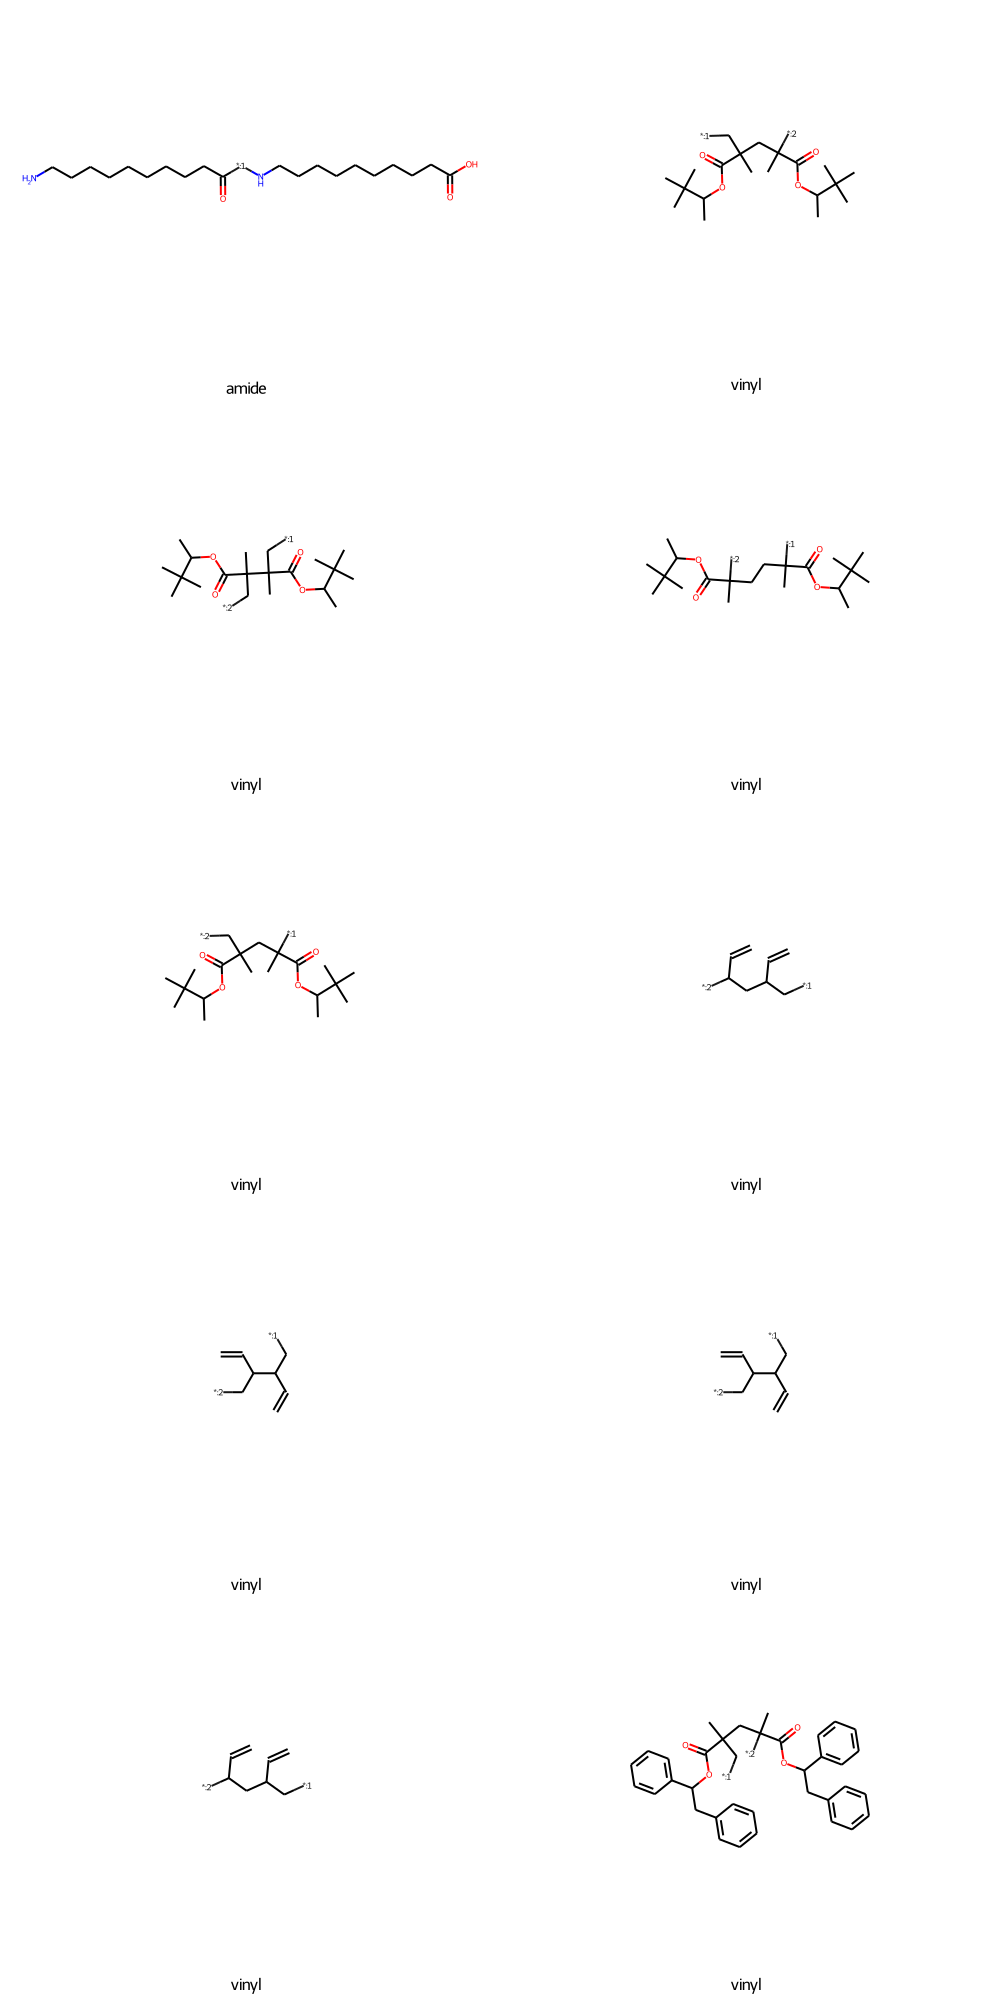

In [31]:
Chem.Draw.MolsToGridImage([Chem.MolFromSmiles(s) for s in df_headtail["smiles_polymer_head_tail"]], molsPerRow=2, legends= [row for row in df_headtail['mechanism']], subImgSize=(500, 400), maxMols=10) 